In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np

# Now, we will load the data set and look at some initial rows and data types of the columns:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

# The data contains a particular month and number of passengers travelling in that month. 
# In order to read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())

## NOTE: You can run remaining codes in this article as well, using this live coding window.

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object

 Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [ ]:
#1. Specify the entire range:
# Unlike numerical index, end index is included here
# Index have to be sorted to work
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
ts['1949-12']

Month
1949-12-01    118
Name: #Passengers, dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

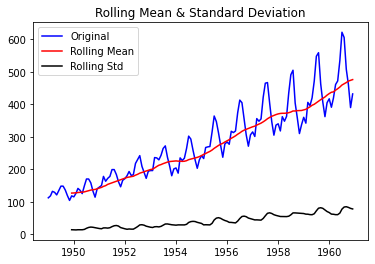

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data)

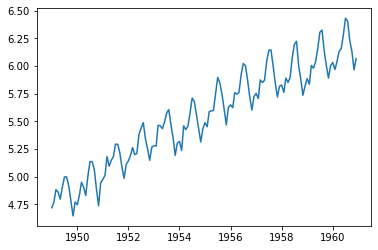

In [ ]:
ts_log = np.log(data)
plt.plot(ts_log)

In [ ]:
ts_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


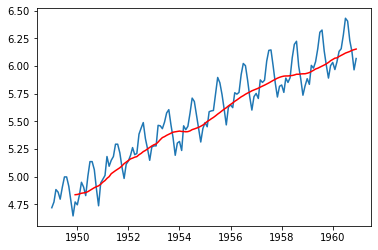

In [ ]:
mov_avg=ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(mov_avg,color='r')

In [ ]:
mov_avg.head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
log_ma_diff =ts_log-mov_avg
log_ma_diff.head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
log_ma_diff.dropna(inplace=True)

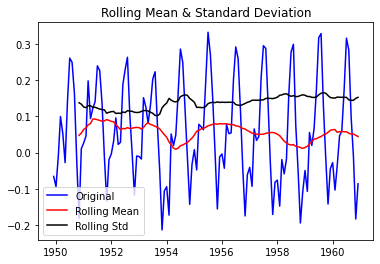

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(log_ma_diff)

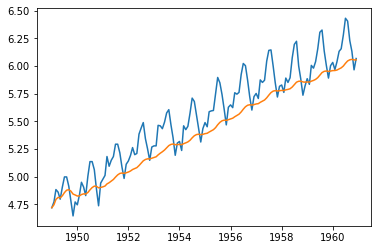

In [ ]:
ts_ewa=ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(ts_ewa)

In [ ]:
ts_log_ewa_diff = ts_log-ts_ewa
ts_log_ewa_diff.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415


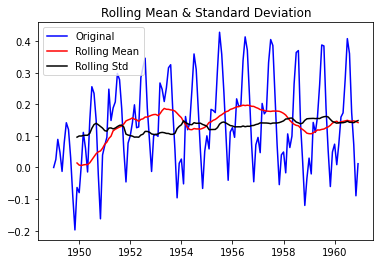

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_log_ewa_diff)

In [ ]:
ts_log_diff=ts_log-ts_log.shift()
ts_log_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


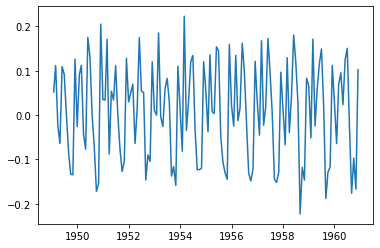

In [ ]:
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)

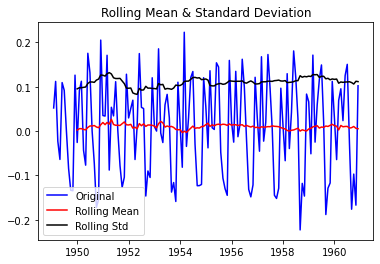

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomp = seasonal_decompose(ts_log)

In [ ]:
trend=decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

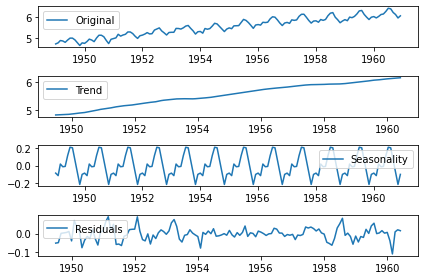

In [ ]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_residual =residual


In [ ]:
ts_log_residual.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,-0.050884
1949-08-01,-0.048415
1949-09-01,0.001223


In [ ]:
ts_log_residual.dropna(inplace=True)

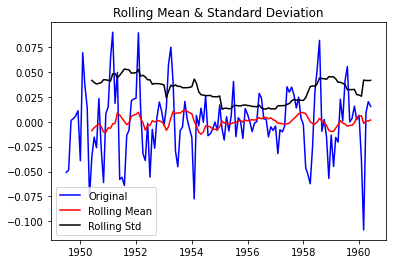

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
test_stationarity(ts_log_residual)

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')

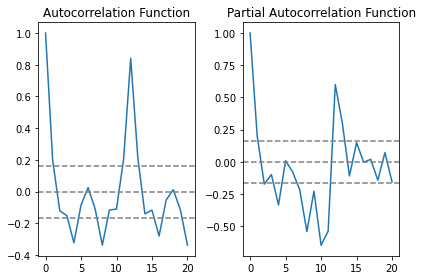

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ts_log_diff.head()

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


Text(0.5, 1.0, 'RSS: 1.5023')

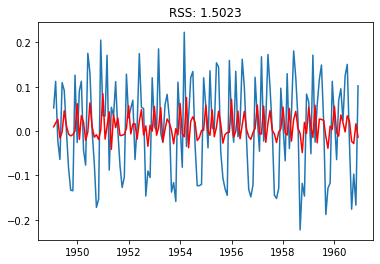

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['#Passengers'])**2))

In [ ]:
results_AR.fittedvalues

Month
1949-02-01    0.009600
1949-03-01    0.018167
1949-04-01    0.026435
1949-05-01   -0.015768
1949-06-01   -0.002144
                ...   
1960-08-01    0.022921
1960-09-01   -0.023143
1960-10-01   -0.028120
1960-11-01    0.016517
1960-12-01   -0.013713
Length: 143, dtype: float64

Text(0.5, 1.0, 'RSS: 1.4721')

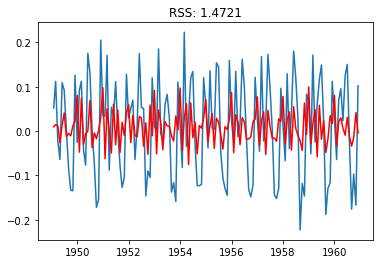

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['#Passengers'])**2))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'RSS: 1.0292')

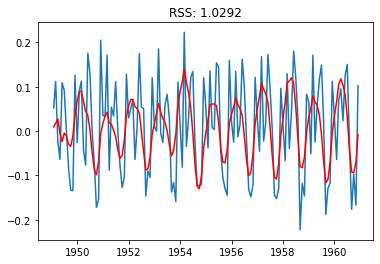

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['#Passengers'])**2))

In [ ]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
pred_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [ ]:
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
pred_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [ ]:
pred_ARIMA_log=pd.Series(ts_log['#Passengers'].iloc[0],index=ts_log.index)

In [ ]:
pred_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [ ]:
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)


Month
1960-08-01    6.091052
1960-09-01    5.998702
1960-10-01    5.904689
1960-11-01    5.834765
1960-12-01    5.826638
dtype: float64

In [ ]:
#pred_ARIMA_log.tail()
#data.tail()
pred.tail()

Month
1960-08-01    441.885942
1960-09-01    402.905433
1960-10-01    366.753033
1960-11-01    341.984335
1960-12-01    339.216313
dtype: float64

In [ ]:
pred = np.exp(pred_ARIMA_log)


Text(0.5, 1.0, 'RMSE: 90.1046')

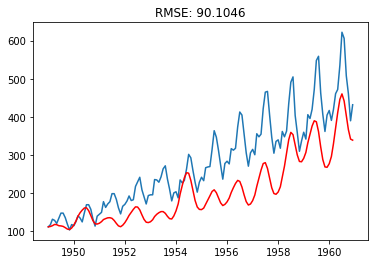

In [ ]:
plt.plot(ts)
plt.plot(pred,color='r')
plt.title('RMSE: %.4f'% np.sqrt(sum((pred-data['#Passengers'])**2)/len(ts)))

In [ ]:
pred.shape

(144,)

In [ ]:
type(pred)

pandas.core.series.Series

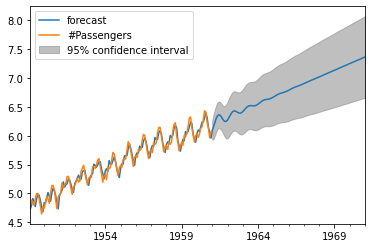

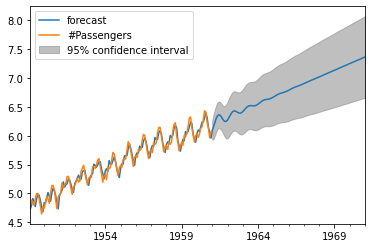

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults
results_ARIMA.plot_predict(1,264)

In [ ]:
results_ARIMA.forecast(steps=120)

(array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
        6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
        6.24738324, 6.25025169, 6.27275833, 6.3094031 , 6.35151493,
        6.38988657, 6.41727384, 6.43011056, 6.4290669 , 6.41842488,
        6.40456152, 6.39403611, 6.39183077, 6.40019497, 6.41833688,
        6.44295405, 6.46937434, 6.49293985, 6.51024118, 6.51989032,
        6.52267575, 6.52112382, 6.5186452 , 6.51853681, 6.52311914,
        6.53322353, 6.54812864, 6.56591553, 6.58410305, 6.60036536,
        6.61313262, 6.62192775, 6.62737781, 6.6309312 , 6.63438679,
        6.63937975, 6.64696495, 6.65739832, 6.67015317, 6.68414244,
        6.69806619, 6.71077894, 6.72157724, 6.73033975, 6.737498  ,
        6.74386367, 6.75037311, 6.7578258 , 6.7666867 , 6.77699812,
        6.78841309, 6.80032843, 6.81207184, 6.82308749, 6.83307124,
        6.8420248 , 6.85022299, 6.85811207, 6.86617326, 6.87479137,
        6.88416288, 6.8942637 , 6.90487876, 6.91